In [55]:
import json

geojson_path = "./Gwangjingu_boundary_data_2.json"
geo_str = json.load(open(geojson_path, encoding="utf-8")) # 'r' 모드 생략
print(geo_str)

{'type': 'Topology', 'arcs': [[[995, 1444], [169, -80], [15, -6], [3, -1], [56, -14], [27, -6], [39, -9], [25, -3], [5, 0], [28, -1], [20, -1], [44, -3]], [[1426, 1320], [43, -20], [-26, -53], [-8, -17], [-15, -30], [-8, -12], [-2, -2], [-2, -11], [-2, -6], [0, -9], [1, -31], [1, -2], [6, -6], [61, -32], [26, -7]], [[1501, 1082], [-37, -81], [-133, -63], [-58, -4], [-26, 5], [-97, 11], [-86, 7], [-7, -37]], [[1057, 920], [-106, 22], [-155, 46]], [[796, 988], [-376, 141]], [[420, 1129], [202, 374]], [[622, 1503], [239, -26], [134, -33]], [[1216, 2079], [42, -24], [27, -21], [1, -3], [2, -22], [-173, -367], [-1, -2], [-1, -1], [-53, -100], [-53, -79], [-12, -16]], [[622, 1503], [353, 677]], [[975, 2180], [241, -101]], [[1525, 2469], [-183, -355], [-16, -34]], [[1326, 2080], [-91, -2], [-19, 1]], [[975, 2180], [-91, 37], [213, 400]], [[1097, 2617], [428, -148]], [[1727, 2427], [100, -621]], [[1827, 1806], [-1, 2], [-20, 16], [-50, 29], [-126, 53], [-120, 51], [-98, 40], [-73, 31], [-26, 1

In [56]:
import folium

map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map

In [57]:
import pandas as pd

care_center_csv = pd.read_csv("./서울시 광진구 어린이집 정보 (표준 데이터).csv" , encoding='cp949')
print(care_center_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 62 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   시군구명             298 non-null    object 
 1   어린이집코드           298 non-null    int64  
 2   어린이집명            298 non-null    object 
 3   어린이집유형           298 non-null    object 
 4   운영현황             298 non-null    object 
 5   우편번호             298 non-null    int64  
 6   상세주소             298 non-null    object 
 7   전화번호             298 non-null    object 
 8   팩스번호             244 non-null    object 
 9   홈페이지주소           80 non-null     object 
 10  보육실수             298 non-null    int64  
 11  보육실 면적           298 non-null    int64  
 12  놀이터수             298 non-null    int64  
 13  CCTV총설치수         298 non-null    int64  
 14  보육교직원수           298 non-null    int64  
 15  정원               298 non-null    int64  
 16  현원               298 non-null    int64  
 17  시설 위도(좌표값)      

In [58]:
care_center_csv_without_na = care_center_csv[['어린이집명', '시설 위도(좌표값)', '시설 경도(좌표값)']].dropna()
care_center_csv_without_na

,어린이집명,시설 위도(좌표값),시설 경도(좌표값)
0,구립 자양이스트폴어린이집,37.534656,127.088955
1,구립 해달별어린이집,37.536761,127.090969
2,구립 새벽어린이집,37.555663,127.092531
3,구립 자양롯데캐슬어린이집,37.537441,127.063639
5,구립 광진그랜드파크어린이집,37.543706,127.081234
...,...,...,...
293,샘터자연친화어린이집,37.542397,127.096226
294,중곡4동어린이집,37.559104,127.091557
295,좋은어린이집,37.536205,127.090321
296,구립 자양어린이집,37.532898,127.075230


In [59]:
import folium
df = care_center_csv_without_na

# 중심 좌표 설정 (첫 번째 행 기준으로)
lat = df.iloc[0]['시설 위도(좌표값)']
lon = df.iloc[0]['시설 경도(좌표값)']

# 지도 생성
m = folium.Map(location=[lat, lon], zoom_start=12)

# 각 행마다 마커 추가
for _, row in df.iterrows():
    folium.Marker(
        location=[row['시설 위도(좌표값)'], row['시설 경도(좌표값)']],
        popup=row.get('어린이집명', '이름 없음') 
    ).add_to(m)

m

C:\Users\309\anaconda3\envs\python312_gwangjingu\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


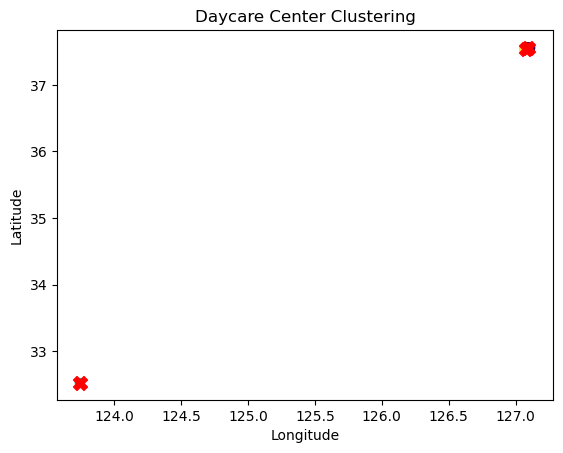

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 위도/경도만 추출
coords = df[['시설 위도(좌표값)', '시설 경도(좌표값)']]

# 클러스터 수 설정 (예: 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(coords)

# 중심 좌표
centroids = kmeans.cluster_centers_

# 시각화
plt.scatter(df['시설 경도(좌표값)'], df['시설 위도(좌표값)'], c=df['cluster'], cmap='viridis')
plt.scatter(centroids[:, 1], centroids[:, 0], color='red', marker='X', s=100)  # 중심
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Daycare Center Clustering')
plt.show()

In [61]:
for lat, lon in centroids:
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(color='red', icon='info-sign'),
        popup='추천 공원 위치'
    ).add_to(m)

m  # 지도 다시 출력